<a href="https://colab.research.google.com/github/R-Madhuram/nlp_tweet_analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP in Tensor Flow

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

!pip install chart_studio
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.3 MB/s eta 0:00:00


NLP or natural language processing is the way to address the problems invovling derivation of information from natural languages. Natural Language understanding is a closely related term that seek to derive information, process and generate new information too. NLP and NLU hence feed on each other.

ANother common term to NLP problem is sequence to sequence problems (seq2seq).

# Check for GPU

In [ ]:
# checking for GPU
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


# Get Helper Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import helper functions .py file from google drive directory
!cp /content/drive/MyDrive/Introduction_to_NLP_in_DeepLearning/helper_functions_NLP_intro.py helper_functions_NLP_intro.py

# import series of helper functions from the file
from helper_functions_NLP_intro import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys


# Get a text data set
We are going to use the data set from kaggle called 'Introduction to NLP' where the text samples of tweet are classified as 'disaster' or 'not a disaster' (https://www.kaggle.com/c/nlp-getting-started/data).


In [ ]:
"""The dataset has been downloaded and stored in the google drive as a zip file and we will use
the helper function unzip_data to unzip the file in this instance."""

"""Note that the helper function file and unzipped data gets created in the space at the drive level
i.e current working directory."""

# Unzip data
unzip_data("/content/drive/MyDrive/Introduction_to_NLP_in_DeepLearning/nlp-getting-started.zip")


Unzipping nlp_getting_started.zip gives the following 3 csv files:
1. sample_submission.csv
2. test.csv
3. train.csv

# 1. Reading data

In [ ]:
# Read training data
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
# Read the first 10 tweets in the data
train_df.head(10)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train_df = train_df[['text','target']]
train_df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [ ]:
# Test data
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# 2. Data Exploration

## 2.1 Visualization of real and fake disaster tweets

In [ ]:
# Counts of real and fake disaster tweets
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Visualization of the counts (Count Plot) of real and fake disaster tweets

x_axis = ['0','1']
y_axis = list(train_df.target.value_counts())

legend_labels = ["Not a Disaster", "Disaster"] # required for legend labels

target = train_df.target # required for percentage label on bar



4342
3271


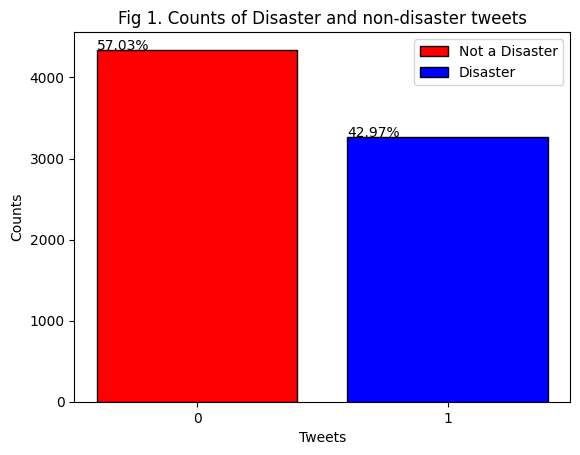

In [ ]:
# Visualization of the counts of real and fake disaster tweets

fig,ax= plt.subplots()

fig1 = plt.bar(x_axis, y_axis, color=["red", "blue"], edgecolor='black', label=legend_labels)
ax.set(ylabel='Counts', xlabel= 'Tweets', title='Fig 1. Counts of Disaster and non-disaster tweets')

for p in fig1:
   height = p.get_height()
   print(height)
   ax.text(x=p.get_x(), y=height, s="{:.2f}%".format((height/len(target))*100), ha='left')

plt.legend()

## 2.2 Number of characters (Histogram) in a tweet

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 3271, dtype: int64


Text(0.5, 0.98, 'Fig 2: Histogram of number of Characters in a tweet')

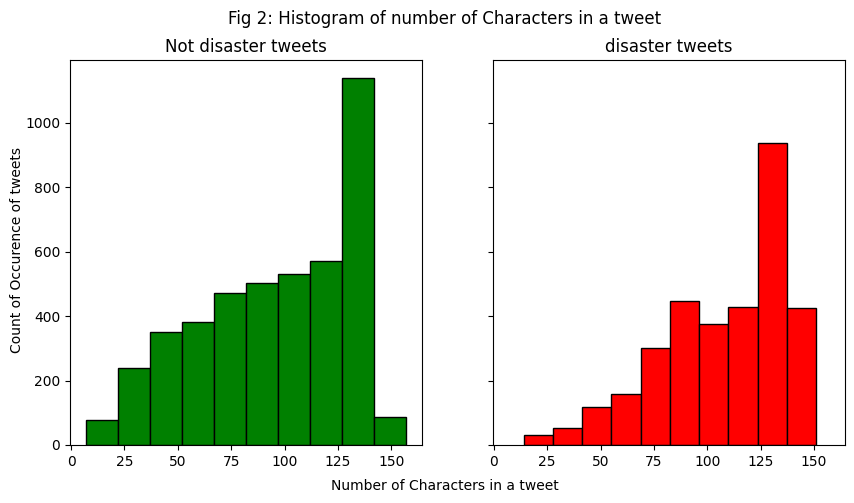

In [ ]:
# Visualization of Number of characters in a tweet (Histogram)

fig,(ax1,ax2)=plt.subplots(1,2,sharex=True, sharey=True,figsize=(10,5))

char_dis = train_df[train_df['target']==1]['text'].str.len()
char_nodis = train_df[train_df['target']==0]['text'].str.len()
print(char_dis)

ax1.hist(char_nodis,color='green', edgecolor='black')
ax1.set_title('Not disaster tweets')

ax2.hist(char_dis,color='red', edgecolor='black')
ax2.set_title('disaster tweets')

fig.text(0.5, 0.02, 'Number of Characters in a tweet', ha='center') # 0.5->center/right/left alignment, 0.02->distance from axis(smaller = further)
fig.text(0.065, 0.5, 'Count of Occurence of tweets', va='center', rotation='vertical') #0.065->distance from axis(bigger=further), 0.5-> center/right/left alignment
fig.suptitle('Fig 2: Histogram of number of Characters in a tweet')


## 2.3 Average Number of characters in each tweet (Distribution Plot)

15       14
16       13
17       16
18       17
19       28
       ... 
7581    104
7582     80
7584    127
7587     18
7593     60
Name: text, Length: 4342, dtype: int64


Text(0.5, 0.98, 'Fig 3: Distribution Plot of average number of characters in each tweet')

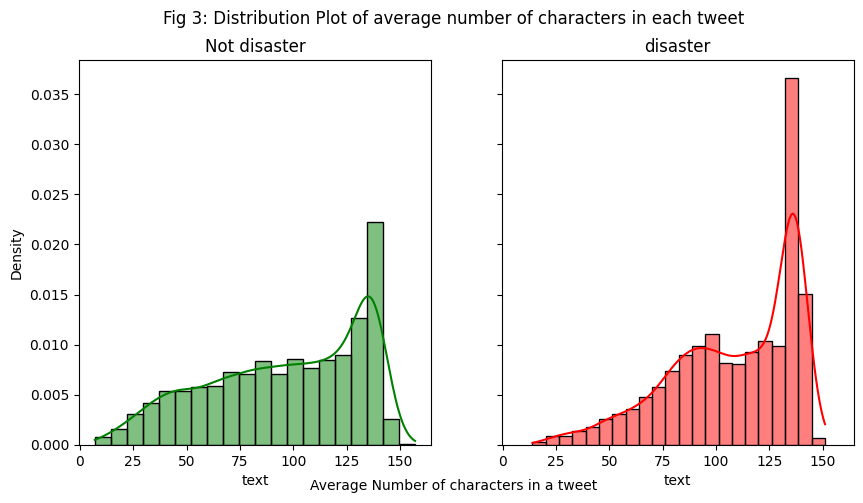

In [ ]:
# Visualization of average number of characters words in a tweet (Distribution Plot)
fig,(ax1,ax2)=plt.subplots(1,2,sharex=True, sharey=True,figsize=(10,5))

tweet_charlen_notdis = train_df[train_df['target']==0]['text'].str.len()
tweet_charlen_dis = train_df[train_df['target']==1]['text'].str.len()
print(tweet_charlen_notdis)

sns.histplot(tweet_charlen_notdis.map(lambda x: np.mean(x)),ax=ax1,color='green', kde=True, stat='density')
ax1.set_title('Not disaster')

sns.histplot(tweet_charlen_dis.map(lambda x: np.mean(x)),ax=ax2,color='red', kde=True, stat='density')
ax2.set_title('disaster')

fig.text(0.5, 0.02, 'Average Number of characters in a tweet', ha='center') # 0.5->center/right/left alignment, 0.02->distance from axis(smaller = further)
#fig.text(0.065, 0.5, 'Density of count of occurence of tweets', va='center', rotation='vertical') #0.065->distance from axis(bigger=further), 0.5-> center/right/left alignment

fig.suptitle('Fig 3: Distribution Plot of average number of characters in each tweet')

In [ ]:
# Visualization of average number of characters in a tweet (Distribution Plot)

avgchar_len_tweet_dis = train_df[train_df['target']==1]['text'].str.len().map(lambda x: np.mean(x))

avgchar_len_tweet_non_dis = train_df[train_df['target']==0]['text'].str.len().map(lambda x: np.mean(x))

group_labels = ['Disaster', 'Non-Disaster']
colors = ['rgb(0, 0, 300)', 'rgb(0, 500, 800)']

figa = ff.create_distplot([avgchar_len_tweet_dis, avgchar_len_tweet_non_dis], group_labels, bin_size=2, colors=colors)
figa.update_layout(title_text="Fig 4: Average number of characters in tweets",title_x=0.5,xaxis_title="Text",yaxis_title="Density").show(renderer='colab')

## 2.3 Number of words in a tweet (Histogram)

15       3
16       3
17       3
18       5
19       3
        ..
7581    13
7582    11
7584    13
7587     2
7593    12
Name: text, Length: 4342, dtype: int64


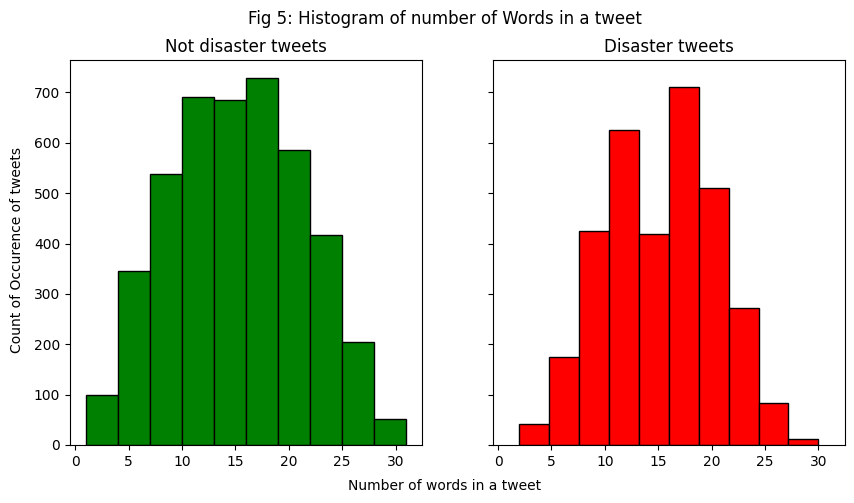

In [ ]:
# Visualization of number of words in a tweet in a Histogram

fig,(ax1,ax2)=plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

tweet_len_notdis = train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x))
print(tweet_len_notdis)
ax1.hist(tweet_len_notdis, color='green', edgecolor = 'black')
ax1.set_title('Not disaster tweets')

tweet_len_dis = train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len_dis, color='red', edgecolor = 'black')
ax2.set_title('Disaster tweets')

fig.text(0.5, 0.02, 'Number of words in a tweet', ha='center') # 0.5->center/right/left alignment, 0.02->distance from axis(smaller = further)
fig.text(0.065, 0.5, 'Count of Occurence of tweets', va='center', rotation='vertical') #0.065->distance from axis(bigger=further), 0.5-> center/right/left alignment
fig.suptitle('Fig 5: Histogram of number of Words in a tweet')


plt.show()


## 2.4 Average number of words in a tweet (Distribution Plot)

15       3
16       3
17       3
18       5
19       3
        ..
7581    13
7582    11
7584    13
7587     2
7593    12
Name: text, Length: 4342, dtype: int64


Text(0.5, 0.98, 'Fig 6: Distribution Plot of average number of words in each tweet')

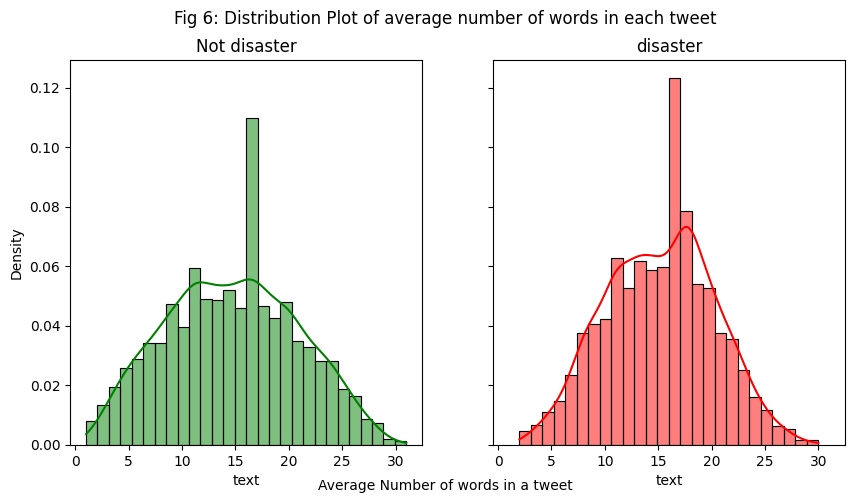

In [ ]:
# Visualization of average number of words in a tweet (Distribution Plot)
fig,(ax1,ax2)=plt.subplots(1,2,sharex=True, sharey=True,figsize=(10,5))

tweet_len_notdis = train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x))
tweet_len_dis = train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x))
print(tweet_len_notdis)

sns.histplot(tweet_len_notdis.map(lambda x: np.mean(x)),ax=ax1,color='green', kde=True, stat='density')
ax1.set_title('Not disaster')

sns.histplot(tweet_len_dis.map(lambda x: np.mean(x)),ax=ax2,color='red', kde=True, stat='density')
ax2.set_title('disaster')

fig.text(0.5, 0.02, 'Average Number of words in a tweet', ha='center') # 0.5->center/right/left alignment, 0.02->distance from axis(smaller = further)
#fig.text(0.065, 0.5, 'Density of count of occurence of tweets', va='center', rotation='vertical') #0.065->distance from axis(bigger=further), 0.5-> center/right/left alignment

fig.suptitle('Fig 6: Distribution Plot of average number of words in each tweet')

In [ ]:
# Visualization of average number of words of both disaster and non-disaster tweets in the same plot

def avgwordlen(strlist):
    # sum=[]
    # for i in strlist:
    #     sum.append(len(i))
    # return sum
    return len(strlist)

avgword_len_dis = train_df[train_df['target']==1]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

avgword_len_non_dis = train_df[train_df['target']==0]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

group_labels = ['Disaster', 'Non-Disaster']
colors = ['rgb(0, 0, 300)', 'rgb(0, 500, 800)']

fig = ff.create_distplot([avgword_len_dis, avgword_len_non_dis], group_labels, bin_size=.7, colors=colors)
fig.update_layout(title_text="Fig 7: Average number of words in tweets",title_x=0.5,xaxis_title="Text",yaxis_title="Density").show(renderer='colab')



## 2.5 Number of characters in a word of a tweet (Histogram)

[[6, 2, 4], [1, 4, 6], [6, 2, 6], [2, 3, 2, 2, 4], [4, 1, 21], [4, 2, 14], [6, 2, 4, 2], [4, 6], [4, 1, 9, 4], [8], [2, 7, 5, 3, 4, 4], [3, 2, 3, 4, 5], [4, 2, 10], [6, 2], [2, 3, 4, 6], [3, 4], [2, 6, 3, 2, 5, 3, 6, 6, 3, 22], [6, 3, 3, 5, 3, 2, 6], [2, 4, 4, 4, 2, 3, 3, 4, 5, 2, 3, 6, 22], [11, 5, 7, 5, 2, 4, 4, 6, 3, 12, 3, 1, 5, 4, 4, 3, 3, 3, 6, 4, 7], [6, 3, 3, 4, 2], [5, 5, 4, 22, 22, 22, 22, 5], [2, 3, 7, 6, 6, 3, 5, 3, 6, 4, 6], [3, 2, 7, 4, 8, 3, 3, 4, 6, 3, 5, 4, 3, 7, 6, 2, 4, 4, 3, 6, 4, 2, 2, 2], [5, 6, 3, 6, 4, 15], [1, 6, 2, 3, 7, 6, 4, 2, 12, 3, 3, 2, 6, 22], [1, 6, 1, 9, 2, 3, 4, 5, 4, 4, 4, 5, 3, 4, 4, 22], [8, 3, 7, 9, 2, 4, 5, 3, 7, 6], [5, 5, 4, 22, 22, 22, 22, 5], [5, 5, 4, 9, 3, 4, 5, 6, 6, 3, 4, 2, 3, 1, 4, 2, 4, 4, 5, 6, 5, 3, 3, 4, 4, 2, 6], [5, 4, 3, 4, 2, 3, 2, 9, 6, 14, 7, 6, 3, 1, 3, 1, 22, 22], [6, 9, 17, 5, 2, 3, 2, 9, 3, 8, 4, 2, 9, 14, 23], [3, 3, 6, 6, 3, 5, 4, 3, 1, 4, 3, 5, 7, 3, 4, 1, 4, 4, 3, 4, 4, 23], [4, 3, 3, 6, 7, 2, 3, 8, 3, 9, 2, 3, 2, 2, 

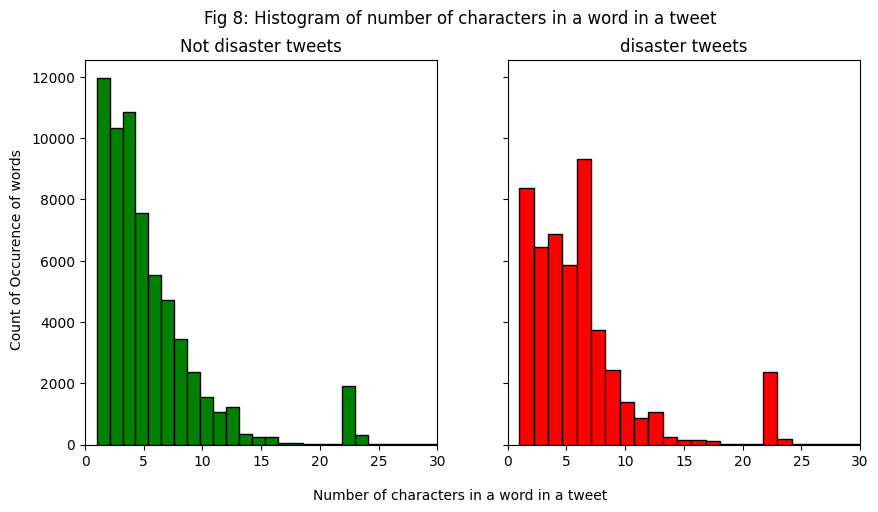

In [ ]:
import itertools

fig,(ax1,ax2)=plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

char_word_nodis_lst = train_df[train_df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x]).tolist()
char_word_dis_lst = train_df[train_df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x]).tolist()
print(char_word_nodis_lst)

merged_0 = list(itertools.chain(*char_word_nodis_lst))
ax1.hist(merged_0,bins=50,color='green', edgecolor='black')
ax1.set_title('Not disaster tweets')
plt.xlim([0, 30])
print(merged_0)

merged_1 = list(itertools.chain(*char_word_dis_lst))
ax2.hist(merged_1,bins=50,color='red',edgecolor='black')
ax2.set_title('disaster tweets')
plt.xlim([0, 30])

fig.text(0.5, 0.001, 'Number of characters in a word in a tweet', ha='center') # 0.5->center/right/left alignment, 0.02->distance from axis(smaller = further)
fig.text(0.05, 0.5, 'Count of Occurence of words', va='center', rotation='vertical') #0.065->distance from axis(smaller=further), 0.5-> center/right/left alignment
fig.suptitle('Fig 8: Histogram of number of characters in a word in a tweet')

plt.show()


## 2.6  Average number of characters in a word in a tweet (Distribution Plot)

15                                       [6, 2, 4]
16                                       [1, 4, 6]
17                                       [6, 2, 6]
18                                 [2, 3, 2, 2, 4]
19                                      [4, 1, 21]
                           ...                    
7581    [11, 5, 10, 2, 3, 7, 4, 3, 8, 7, 2, 8, 22]
7582            [7, 6, 1, 5, 4, 7, 8, 5, 1, 4, 22]
7584    [5, 5, 3, 5, 2, 8, 9, 7, 7, 8, 13, 20, 23]
7587                                       [6, 11]
7593          [1, 4, 5, 1, 6, 4, 4, 3, 8, 2, 6, 5]
Name: text, Length: 4342, dtype: object


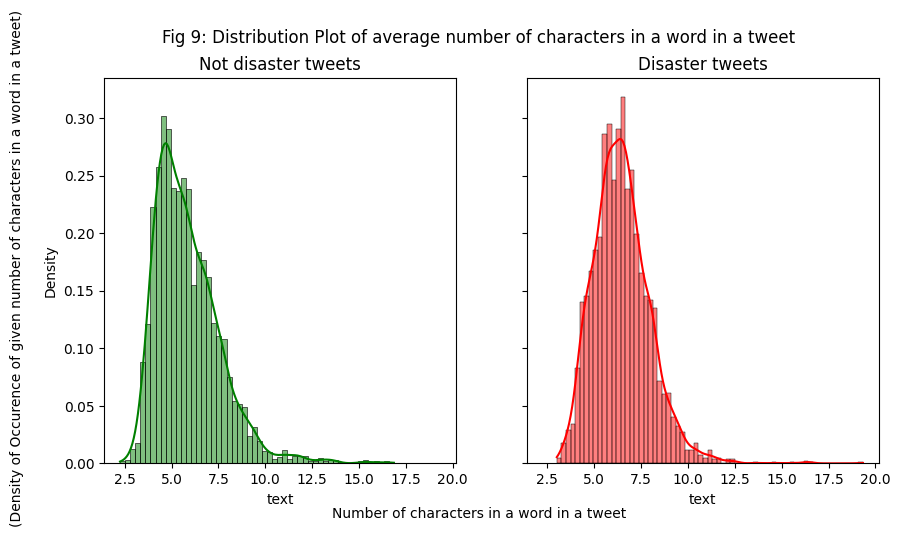

In [ ]:
fig,(ax1,ax2)=plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

char_word_nodis = train_df[train_df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
char_word_dis = train_df[train_df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
print(char_word_nodis)

sns.histplot(char_word_nodis.map(lambda x: np.mean(x)),ax=ax1,color='green',stat='density',kde=True)
ax1.set_title('Not disaster tweets')

sns.histplot(char_word_dis.map(lambda x: np.mean(x)),ax=ax2,color='red', stat='density', kde=True)
ax2.set_title('Disaster tweets')

fig.text(0.5, 0.001, 'Number of characters in a word in a tweet', ha='center') # 0.5->center/right/left alignment, 0.001->distance from axis(smaller = further)
fig.text(0.031, 0.5, '(Density of Occurence of given number of characters in a word in a tweet)', va='center', rotation='vertical') #0.065->distance from axis(smaller=further), 0.5-> center/right/left alignment
fig.suptitle('Fig 9: Distribution Plot of average number of characters in a word in a tweet')

plt.show()

In [ ]:
# Visualization of average character length of a word of both disaster and non-disaster tweets in the same plot

def avgcharlen(strlist):
    sum=[]
    # print(strlist)
    for i in strlist:
      sum.append(len(i))
    return sum

avgchar_len_dis = train_df[train_df['target']==1]['text'].str.split().apply(avgcharlen).map(lambda x: np.mean(x))

avgchar_len_non_dis = train_df[train_df['target']==0]['text'].str.split().apply(avgcharlen).map(lambda x: np.mean(x))

group_labels = ['Disaster', 'Non-Disaster']
colors = ['rgb(0, 0, 90)', 'rgb(0, 600, 600)']

fig2 = ff.create_distplot([avgchar_len_dis, avgchar_len_non_dis], group_labels, bin_size=.5, colors=colors)
fig2.update_layout(title_text="Fig 10: Average character length of a word in tweets",title_x=0.5,xaxis_title="Text",yaxis_title="Density").show(renderer='colab')


# Word Cloud Visualization

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## 3.1 All tweet wordcloud

There are 776810 words in the combination of all tweets.
There are 356909 words in the combination of all disaster tweets.
There are 419900 words in the combination of all non-disaster tweets.


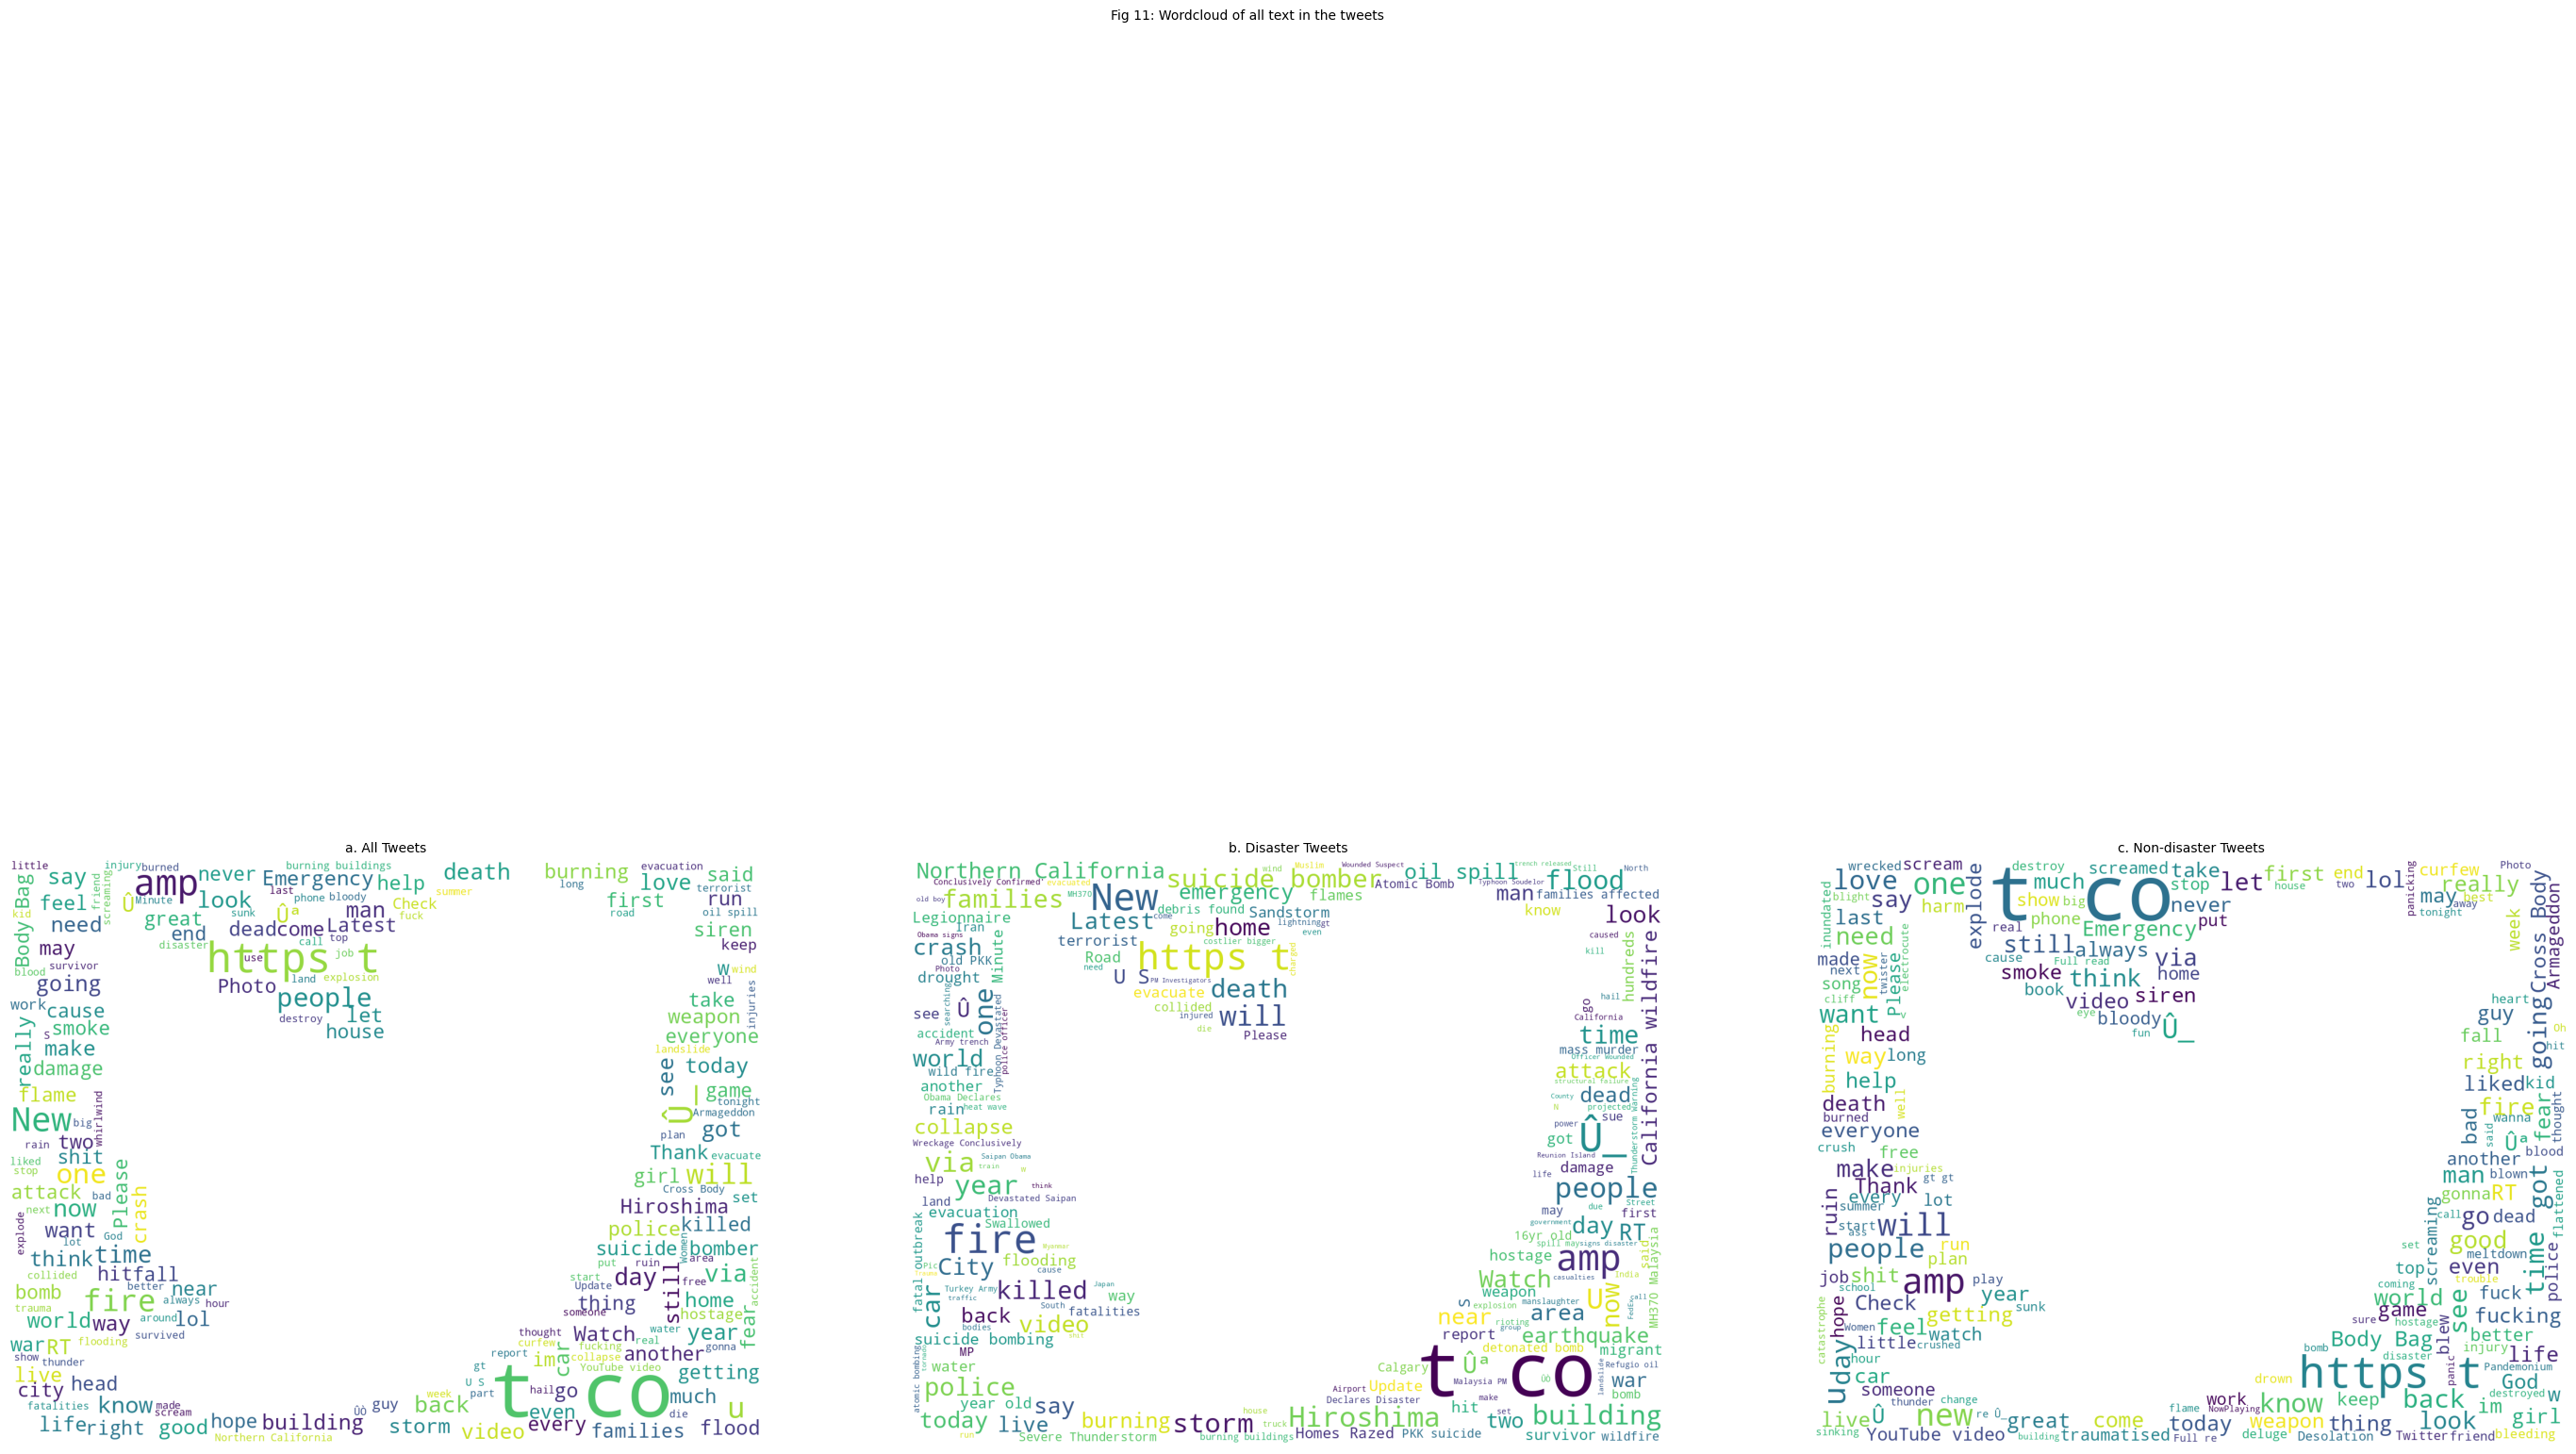

In [ ]:
# Get all the text in all the tweets
text = " ".join(tweet for tweet in train_df.text)
print ("There are {} words in the combination of all tweets.".format(len(text)))

# Get all the text of disaster tweets
text_dis = " ".join(tweet for tweet in train_df[train_df['target']==1].text)
print ("There are {} words in the combination of all disaster tweets.".format(len(text_dis)))

# Get all the text of non-disaster tweet
text_nodis = " ".join(tweet for tweet in train_df[train_df['target']==0].text)
print ("There are {} words in the combination of all non-disaster tweets.".format(len(text_nodis)))

# Generate wordcloud of all the text of all the tweets
fig,(ax1,ax2,ax3)=plt.subplots(1, 3, sharex=True, sharey=True, figsize=(35,25))


mask = np.array(Image.open("/content/drive/MyDrive/Introduction_to_NLP_in_DeepLearning/tweet_image.png"))

wordcloud1 = WordCloud(background_color="white",mask=mask).generate(text)
# plt.figure()
ax1.imshow(wordcloud1)
ax1.axis("off")
ax1.set_title('a. All Tweets',fontsize='medium')
ax1.set

wordcloud2 = WordCloud(background_color="white",mask=mask).generate(text_dis)
# plt.figure()
ax2.imshow(wordcloud2)
ax2.set_title('b. Disaster Tweets', fontsize='medium')
ax2.axis("off")

wordcloud3 = WordCloud(background_color="white",mask=mask).generate(text_nodis)
# plt.figure()
ax3.imshow(wordcloud3)
ax3.set_title('c. Non-disaster Tweets', fontsize='medium')
ax3.axis("off")

fig.suptitle('Fig 11: Wordcloud of all text in the tweets', fontsize='medium')
fig.show()





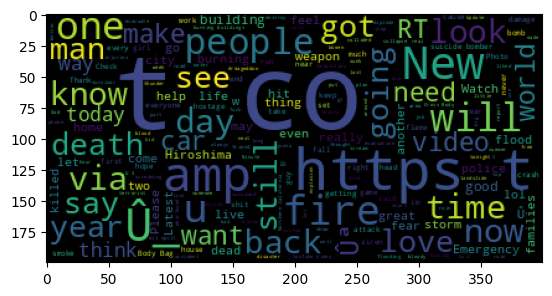

In [ ]:
#mask = np.array(Image.open("/content/drive/MyDrive/Introduction_to_NLP_in_DeepLearning/tweet_image.png"))

wordcloud1 = WordCloud().generate(text)
plt.imshow(wordcloud1)